<a href="https://colab.research.google.com/github/Elay-math/Metodos-Numericos-/blob/main/Chebyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

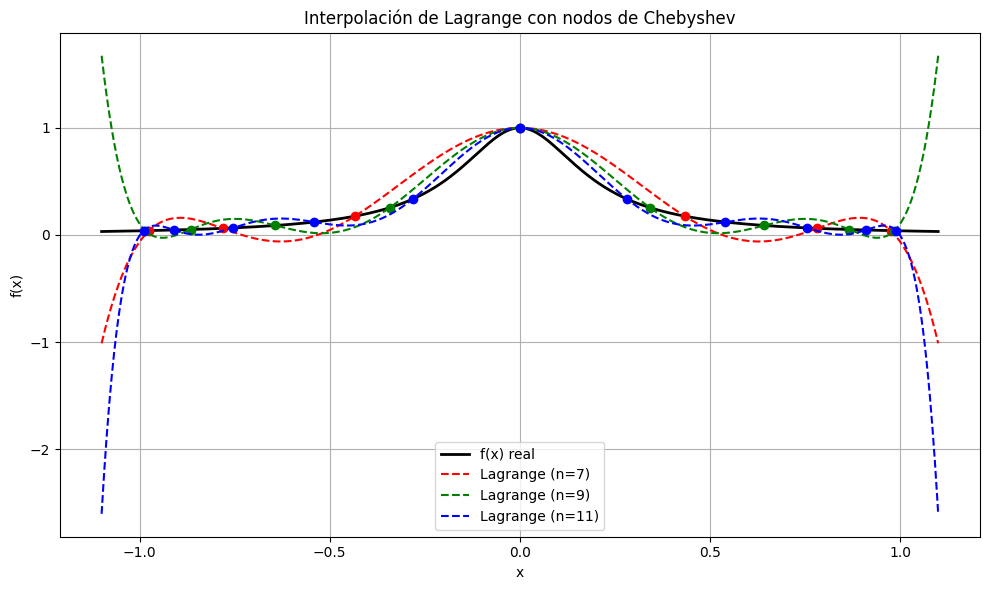

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from tabulate import tabulate

# Función de Runge
f = lambda x: 1 / (1 + 25 * x**2)

# Derivada de Runge para Hermite
df = lambda x: (-50 * x) / (1 + 25 * x**2)**2

# Nodos de Chebyshev en [a, b]
def nodos_chebyshev(n, a, b):
    k = np.arange(1, n + 1)
    x_cheb = np.cos((2 * k - 1) * np.pi / (2 * n))
    return 0.5 * (a + b) + 0.5 * (b - a) * x_cheb

# Lagrange
def polinomio_lagrange(nodos, valores):
    x = sp.Symbol('x')
    n = len(nodos)
    polinomio = 0
    for i in range(n):
        xi, yi = nodos[i], valores[i]
        termino = 1
        for j in range(n):
            if j != i:
                xj = nodos[j]
                termino *= (x - xj) / (xi - xj)
        polinomio += yi * termino
    polinomio = sp.simplify(polinomio)
    return sp.lambdify(x, polinomio, 'numpy')

# Intervalo de interpolación
a, b = -1, 1
x_eval = np.linspace(a - 0.1, b + 0.1, 1000)
y_true = f(x_eval)

# Gráficas de Lagrange con nodos de Chebyshev
nodos_lista = [7, 9, 11]
colores = ['r', 'g', 'b']
labels = ["n=7", "n=9", "n=11"]

plt.figure(figsize=(10, 6))
plt.plot(x_eval, y_true, 'k-', label='f(x) real', linewidth=2)

for n, color, label in zip(nodos_lista, colores, labels):
    x_cheb = nodos_chebyshev(n, a, b)
    y_cheb = f(x_cheb)
    f_lagrange = polinomio_lagrange(x_cheb, y_cheb)
    y_interp = f_lagrange(x_eval)
    plt.plot(x_eval, y_interp, color=color, linestyle='--', label=f'Lagrange ({label})')
    plt.plot(x_cheb, y_cheb, color + 'o')

plt.title("Interpolación de Lagrange con nodos de Chebyshev")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()